In [2]:
import cv2
import os
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt

In [3]:
mp_holistic=mp.solutions.holistic #Holistic model for downloading the model
mp_drawing=mp.solutions.drawing_utils #Drawing utilities for drawing

In [4]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #color convertion brg2rgb
    image.flags.writeable=False #image is no longer writiable
    results=model.process(image) #make prediction
    image.flags.writeable=True #image is now writiable
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #color convertion rgb2brg
    return image,results

In [5]:
type(results.face_landmarks)

NameError: name 'results' is not defined

In [7]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)     #draw face connections so mp_holistic.allconnection are immutable
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)      #pose con
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #left hand conn
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)#rigth hand conn

In [8]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))     
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,44,121),thickness=1,circle_radius=1))      
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=1,circle_radius=1)) 
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=1,circle_radius=1))

In [75]:
cap=cv2.VideoCapture(0)
# access mediapipe model ;min detection confid is initial detection and min tracking confidence if tracking  
with mp_holistic.Holistic(min_detection_confidence=0.45, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read fead
        ret,frame=cap.read()
        frame=cv2.resize(frame,(900,500))
        #make detections and results are in mediapipe
        image,results=mediapipe_detection(frame,holistic)
        print(results)
        #draw landmarks
        draw_styled_landmarks(image,results)
        #show to the screen
        cv2.imshow('video cam',image)
        #beake gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
#results has many differenttype of landmarks each defies a perticular key element

In [8]:
#frame

In [9]:
#draw_landmarks(frame,results)

In [10]:
#plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [11]:
#plt.imshow(frame)

In [12]:
#mp_drawing.draw_landmarks??

In [13]:
                                          #Extracting key points

In [14]:
#len(results.pose_landmarks.landmark)
#results.pose_landmarks

In [15]:
#pose=[]
#for res in results.pose_landmarks.landmark:
    #test=np.array([res.x,res.y,res.z,res.visibility])
    #pose.append(test)
#same thing in list comprehension

In [16]:
#if results dont see a landmarks it throws an error so we have to error handel

In [17]:
#pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [18]:
# lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [19]:
# rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
# face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [21]:
#test

In [22]:
#face.shape

In [10]:
pose1 = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    pose1.append(test)

In [11]:
pose1

[array([ 0.622163  ,  0.43942478, -0.04618043]),
 array([ 0.62255085,  0.38822165, -0.05199476]),
 array([ 0.62165427,  0.41449827, -0.03541363]),
 array([ 0.61195123,  0.35886163, -0.02662359]),
 array([ 0.62223005,  0.37476683, -0.05146185]),
 array([ 0.62121373,  0.36313853, -0.04246992]),
 array([ 0.61847281,  0.34054747, -0.00199745]),
 array([0.54685605, 0.36579424, 0.03051143]),
 array([0.61723769, 0.31865174, 0.01513899]),
 array([0.6168704 , 0.30195153, 0.01999839]),
 array([0.61393321, 0.24934401, 0.05448088]),
 array([ 0.62223893,  0.44644523, -0.04675284]),
 array([ 0.62215906,  0.4543449 , -0.04500754]),
 array([ 0.62199169,  0.45996788, -0.04202396]),
 array([ 0.62227505,  0.4649317 , -0.04532166]),
 array([ 0.62262785,  0.46925658, -0.04849894]),
 array([ 0.62288457,  0.47647312, -0.05257048]),
 array([ 0.62302297,  0.48617178, -0.05395067]),
 array([ 0.62307882,  0.50998002, -0.04920215]),
 array([ 0.62240118,  0.3986654 , -0.04924477]),
 array([ 0.61300141,  0.40472874

In [12]:
np.shape(np.array(pose1))

(468, 3)

In [13]:
#rh

In [14]:
def exract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,face,lh,rh])

In [15]:
result=exract_keypoints(results)

In [16]:
result

array([ 0.62460566,  0.40327141, -0.88146001, ...,  0.        ,
        0.        ,  0.        ])

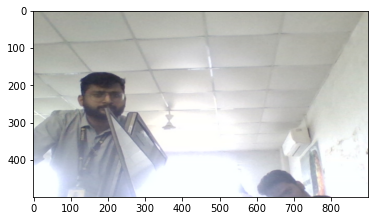

In [76]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [25]:
                                #setting up folders for collections

In [27]:
#path for exported data
DATA_PATH=os.path.join('MP_Data')

#actions that we try to detect
actions=np.array(['hello','thanks','iloveyou'])

#thirty video worth of data
no_sequences=30
#videos are going to be 30 frames in length
sequence_length=30

In [27]:
#creating for all actions
#hello
#sub folders
    ##0,
    ##1,
    #.....
    #30
#thanks


#iloveyou

In [19]:
DATA_PATH

'MP_Data'

In [28]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [15]:
##collecting keypoints and training and testing

In [29]:
cap=cv2.VideoCapture(0)
# access mediapipe model ;min detection confid is initial detection and min tracking confidence if tracking  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #loop through sequence and actions
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                # read fead
                ret,frame=cap.read()
                
                #make detections and results are in mediapipe
                image,results=mediapipe_detection(frame,holistic)
                print(results)
                #draw landmarks
                draw_styled_landmarks(image,results)
                
                #apply collection wait logic
                if frame_num==0:
                    cv2.putText(image,"Starting collection",(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                
                    cv2.putText(image,"Collecting Frames for {} video no {}".format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,    cv2.LINE_AA)
                    
                    cv2.waitKey(2000)
                else:
                     cv2.putText(image,"Collecting Frames for {} video no {}".format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv2.LINE_AA) 
                     
                keypoints=exract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #show to the screen
                cv2.imshow('video cam',image)
                #beake gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [74]:
cap.release()
cv2.destroyAllWindows()

### training split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
lable_map={}
i=0
for action in actions: 
    lable_map.update({action:i})
    i+=1

In [35]:
lable_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [36]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(lable_map[action])


In [43]:
sequences

[[array([ 0.62326235,  0.48370254, -0.6728797 , ...,  0.07559766,
          0.52962255, -0.07056279]),
  array([ 0.60013855,  0.48711929, -0.52428287, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.59172493,  0.47739112, -0.60901672, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.57996738,  0.47419184, -0.61360842, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.58389026,  0.47443575, -0.66419262, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.58474147,  0.47460821, -0.77874684, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.58531606,  0.47510532, -0.87757748, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.58708966,  0.4751133 , -0.90191919, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.58916318,  0.47006094, -0.90811747, ...,  0.62985921,
          0.7969498 , -0.10977767]),
  array([ 0.58934337,  0.47025827, -0.88411522, ...,  0.42129523,
       

In [37]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [44]:
np.array(sequences).shape

(90, 30, 1662)

In [45]:
np.array(labels).shape

(90,)

In [47]:
labels[29]

0

In [48]:
x=np.array(sequences)

In [49]:
x.shape

(90, 30, 1662)

In [50]:
y=to_categorical(labels).astype(int)

In [33]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [54]:
np.array(y).shape

(90, 3)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [52]:
X_train.shape

(85, 30, 1662)

In [53]:
y_test.shape

(5, 3)

# models

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [56]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [57]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [58]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [59]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 145ms/step - loss: 2.4041 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 179ms/step - loss: 7.6084 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 96ms/step - loss: 6.8366 - categorical_accuracy: 0.2706
Epoch 4/2000
3/3 [==============================] - 0s 148ms/step - loss: 10.5551 - categorical_accuracy: 0.3059
Epoch 5/2000
3/3 [==============================] - 0s 147ms/step - loss: 22.7104 - categorical_accuracy: 0.3412
Epoch 6/2000
3/3 [==============================] - 0s 164ms/step - loss: 50.2536 - categorical_accuracy: 0.3176
Epoch 7/2000
3/3 [==============================] - 0s 144ms/step - loss: 98.6761 - categorical_accuracy: 0.2824
Epoch 8/2000
3/3 [==============================] - 0s 115ms/step - loss: 90.0595 - categorical_accuracy: 0.3059
Epoch 9/2000
3/3 [==============================] - 0s 107ms/step - loss: 95.8855 - categorical_accu

In [38]:
res=[.2,.7,.1]

In [39]:
actions[np.argmax(res)]

'thanks'

In [60]:
res=model.predict(X_test)

1/1 [==============================] - 1s 509ms/step


In [61]:
res

array([[7.8943772e-03, 3.0677682e-01, 6.8532878e-01],
       [7.7563589e-03, 9.7454065e-01, 1.7702976e-02],
       [4.9341172e-01, 1.0732538e-01, 3.9926293e-01],
       [3.9104227e-04, 3.4799678e-03, 9.9612892e-01],
       [4.6941596e-01, 9.5539369e-02, 4.3504459e-01]], dtype=float32)

In [62]:
actions[np.argmax(res[4])]

'hello'

In [63]:
actions[np.argmax(y_test[4])]

'hello'

In [64]:
model.save('action.h5')

In [71]:
from tensorflow.keras.models import load_model



In [77]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [78]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [79]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [80]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [81]:
accuracy_score(ytrue, yhat)

1.0

In [83]:
keypoints.shape

(1662,)

In [94]:
sequence = [] # we need 30 frame of data to actually predict
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic in order 
        keypoints = exract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            cv2.putText(image,actions[np.argmax(res)] , (3,30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
        #3. Viz logic
            '''if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)'''
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [86]:
X_test[0].shape

(30, 1662)